# Block 5 Exercise 1: Classification

## MNIST Data
In these exercises we are using the MNIST data set on handwritten digits to compare supervised classification algorithms...   

In [1]:
#imports 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)


In [3]:
#the full MNIST data set contains 70k samples of digits 0-9 as 28*28 gray scale images (represented as 784 dim vectors)
np.shape(X)

(70000, 784)

### E1.1: Use SkLearn methods to split the MNIST data into random train and test sets. Use 60k samples for training.  


In [4]:
# Exercise 1
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=60000)
np.shape(X_train)

(60000, 784)

### E1.2: Visualize the data.
* Plot some data samples as images (use https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.imshow.html)

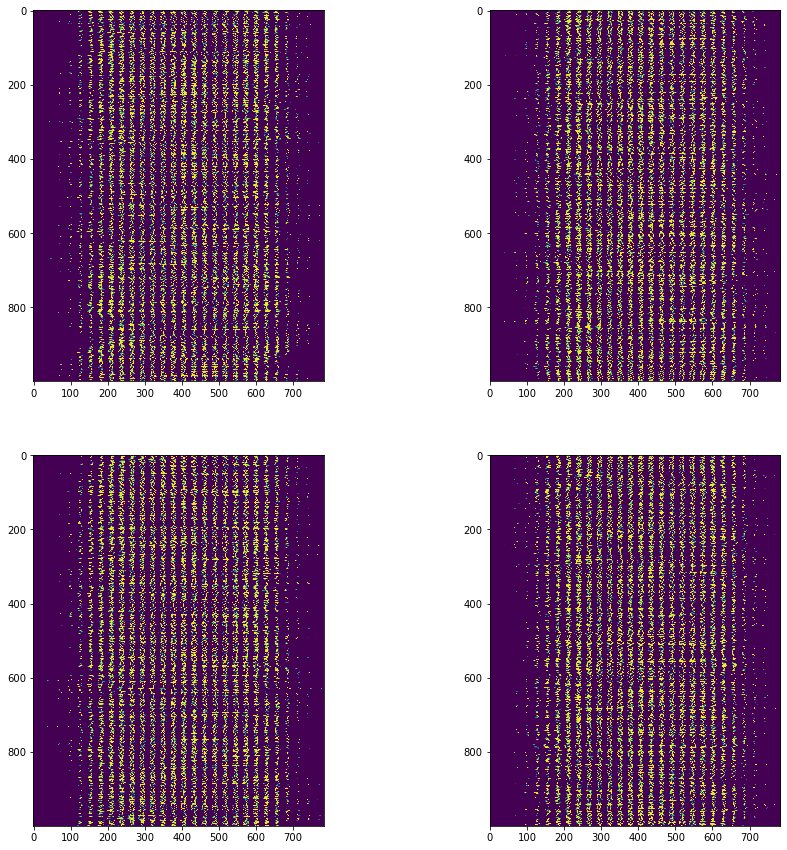

In [5]:
# Exercise 2
fig,axes = plt.subplots(2,2,figsize=(15,15))
axes[0,0].imshow(X_train[:1000])
axes[0,1].imshow(X_test[:1000])
axes[1,0].imshow(X_train[10000:11000])
axes[1,1].imshow(X_test[8000:9000])

### E1.3: Train models on the train data.
Train the following models with default parameters on the train data.
* [Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) (assuming a Gaussian distribution of the data)
* [Simple linear model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html#sklearn.linear_model.SGDClassifier)
   * use ``loss='log'`` to reproduce our logistic loss function 
* [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

Compare the training accuracy (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) for all three models.

In [15]:
# Exercise 3
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf=GaussianNB()
clf.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [21]:
# Accuracy of Naive Bayes
acc=clf.score(X_train,y_train)
print("Accuracy of Naive Bayes Model: {}".format(acc))
acc_score=accuracy_score(y_train,clf.predict(X_train))
print("Accuracy of Naive Bayes Model: {}".format(acc_score))

Accuracy of Naive Bayes Model: 0.5576
Accuracy of Naive Bayes Model: 0.5576


In [17]:
# Confusion Matrix Naive Bayes
cf_NB=confusion_matrix(y_test,clf.predict(X_test))
cf_NB

array([[ 889,    2,   13,    3,    1,    3,   25,    0,   19,   16],
       [   1, 1078,    3,    5,    0,    4,   14,    0,   16,   14],
       [  93,   24,  291,   57,    3,    3,  272,    2,  223,   16],
       [  88,   66,   13,  342,    4,    1,   79,    5,  319,  109],
       [  35,    6,    6,    4,  138,    8,  110,    9,  157,  469],
       [ 123,   14,    4,   18,    7,   38,   63,    2,  529,   82],
       [   9,   18,    5,    1,    0,    6,  964,    0,   14,    3],
       [   1,    5,    2,   11,    8,    4,    1,  346,   34,  630],
       [  16,  115,    5,   10,    3,    3,   26,    3,  620,  198],
       [   4,    4,    4,    1,    7,    0,    0,   14,   18,  949]],
      dtype=int64)

In [11]:
# Exercise 3
# Simple linear model
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

slm=make_pipeline(StandardScaler(),SGDClassifier(loss='log'))
slm.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdclassifier',
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='log',
                               max_iter=1000, n_iter_no_change=5, n_jobs=None,
                               penalty='l2', power_t=0.5, random_state=None,
                               shuffle=True, tol=0.001, validation_fraction=0.1,
                               verbose=0, warm_start=False))],
         verbose=False)

In [22]:
# Accuracy of simple linear model
slm_acc=slm.score(X_train,y_train)
print("Accuracy of simple linear model: {}".format(slm_acc))
rfacc_score=accuracy_score(y_train,slm.predict(X_train))
print("Accuracy of Random Forest: {}".format(rfacc_score))

Accuracy of simple linear model: 0.9078166666666667
Accuracy of Random Forest: 0.9078166666666667


In [18]:
# Confusion Matrix simple linear model
cf_slm=confusion_matrix(y_test,slm.predict(X_test))
cf_slm

array([[ 918,    0,    2,    1,    0,    4,    4,    1,   41,    0],
       [   0, 1083,    2,    1,    0,    9,    0,    0,   36,    4],
       [   4,    2,  882,    7,   14,    4,   11,    2,   57,    1],
       [   2,    1,   20,  862,    0,   51,    2,    6,   77,    5],
       [   3,    3,   11,    1,  837,    1,    3,    4,   52,   27],
       [   4,    5,    3,   25,   11,  713,    9,    4,   95,   11],
       [   5,    1,   11,    0,   10,   13,  950,    1,   29,    0],
       [   3,    2,    9,    5,    2,    0,    1,  960,   34,   26],
       [   0,    7,   10,   15,    0,   16,    5,    0,  943,    3],
       [   2,    3,    3,    9,   22,    3,    0,   25,   58,  876]],
      dtype=int64)

In [9]:
# Exercise 3
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
# Accuracy of Random Forest
rf_acc=rf.score(X_train,y_train)
print("Accuracy of Random Forest: {}".format(rf_acc))
rfacc_score=accuracy_score(y_train,rf.predict(X_train))
print("Accuracy of Random Forest: {}".format(rfacc_score))

Accuracy of Random Forest: 1.0
Accuracy of Random Forest: 1.0


In [19]:
# Confusion Matrix Random Forest
cf_rf=confusion_matrix(y_test,rf.predict(X_test))
cf_rf

array([[ 960,    0,    0,    0,    0,    2,    3,    1,    5,    0],
       [   0, 1126,    1,    2,    1,    3,    0,    0,    1,    1],
       [   5,    0,  968,    2,    5,    0,    1,    1,    2,    0],
       [   1,    0,   12,  980,    0,   15,    0,    8,    8,    2],
       [   1,    1,    1,    0,  920,    0,    0,    1,    1,   17],
       [   2,    1,    2,   11,    3,  841,    5,    0,    9,    6],
       [   2,    0,    0,    0,    5,    9, 1000,    0,    4,    0],
       [   1,    4,    8,    2,    3,    0,    0, 1013,    2,    9],
       [   0,    5,    4,   11,    4,   10,    5,    1,  947,   12],
       [   2,    0,    0,   12,   11,    2,    1,    9,    7,  957]],
      dtype=int64)

### E1.4: Evaluate and compare the models on the test set.
* compute the test [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) 
* compute the [F-Measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score)
* plot a [ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) for the class "5" for all three models.
                          

In [24]:
# Accuracy for test data
NB_test_accuracy=accuracy_score(y_test,clf.predict(X_test))
SLM_test_accuracy=accuracy_score(y_test,slm.predict(X_test))
RF_test_accuracy=accuracy_score(y_test,rf.predict(X_test))
print("Naive Bayes test accuracy: {}".format(NB_test_accuracy))
print("SLM test accuracy: {}".format(SLM_test_accuracy))
print("Random Forest test accuracy: {}".format(RF_test_accuracy))

Naive Bayes test accuracy: 0.5655
SLM test accuracy: 0.9024
Random Forest test accuracy: 0.9712


In [28]:
# F-Measure
from sklearn.metrics import f1_score
NB_f1_score=f1_score(y_test,clf.predict(X_test),average='macro')
SLM_f1_score=f1_score(y_test,slm.predict(X_test),average='macro')
RF_f1_score=f1_score(y_test,rf.predict(X_test),average='macro')
print("Naive Bayes f1 score: {}".format(NB_test_accuracy))
print("SLM f1 score: {}".format(SLM_test_accuracy))
print("Random Forest f1 score: {}".format(RF_test_accuracy))

Naive Bayes f1 score: 0.5655
SLM f1 score: 0.9024
Random Forest f1 score: 0.9712


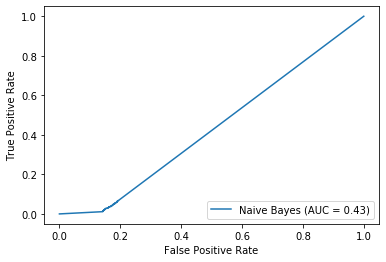

In [50]:
# ROC Curves
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import auc

fpr, tpr, _ = roc_curve(y_test,clf.predict_proba(X_test)[:,1],pos_label=clf.classes_[5])
roc_auc = auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Naive Bayes').plot()

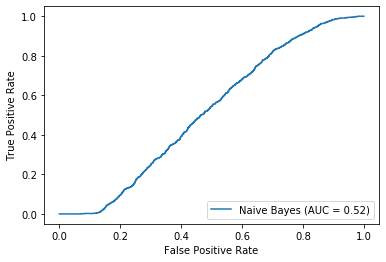

In [52]:
fpr, tpr, _ = roc_curve(y_test,slm.decision_function(X_test)[:,1],pos_label=clf.classes_[5])
roc_auc = auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Simple Linear Model').plot()

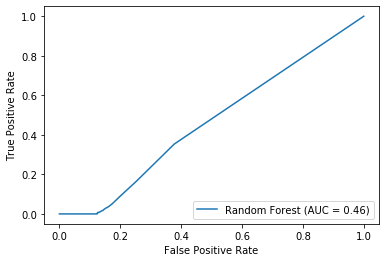

In [54]:
fpr, tpr, _ = roc_curve(y_test,rf.predict_proba(X_test)[:,1],pos_label=clf.classes_[5])
roc_auc = auc(fpr,tpr)
roc_display = RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Random Forest').plot()